In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_circles
from sklearn import metrics, svm

In [71]:
def make_meshgrid(x,y,h=0.2):
  x_min, x_max = x.min() -1, x.max() +1
  y_min, y_max= y.min() -1, y.max() +1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  return xx,yy

def plot_contours(ax,clf,xx,yy,**params):
  Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  out=ax.contour(xx,yy,Z,**params)
  return out

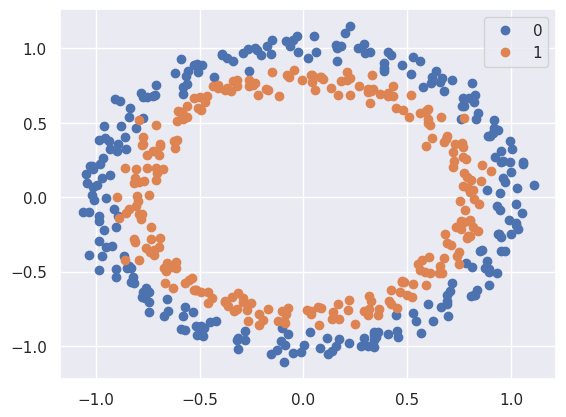

In [72]:
samples = 500
train_prop=0.8
x,y = make_circles(n_samples=samples, noise=0.05, random_state=123)
df=pd.DataFrame(dict(x=x[:,0],y=x[:,1],label=y))
groups=df.groupby('label')
fig,ax=plt.subplots()
ax.margins(0.05)
for name,group in groups:
  ax.plot(group.x, group.y,marker='o', linestyle='',ms=6, label=name)
ax.legend()
plt.show()

In [73]:
x=(x-x.min())/(x.max()-x.min())


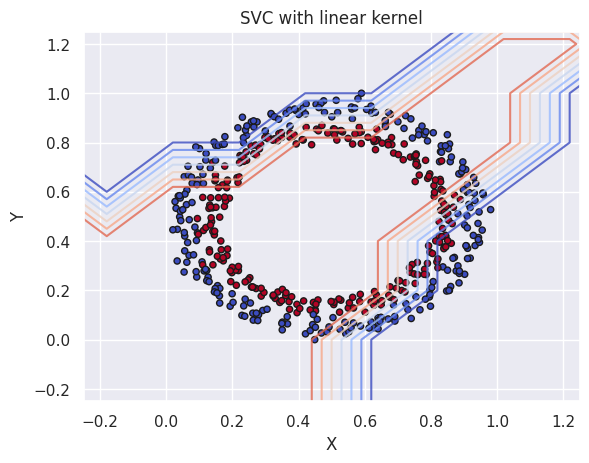

In [80]:
C=1.0
models=svm.SVC(kernel='poly',C=C)
models.fit(x,y)
titles=('SVC with linear kernel')
fig,sub=plt.subplots()
plt.subplots_adjust(wspace=0.4,hspace=0.4)
X0,X1=x[:,0],x[:,1]
xx,yy=make_meshgrid(X0,X1)
plot_contours(sub,models,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
sub.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k')
sub.set_xlim(-0.25,1.25)
sub.set_ylim(-0.25,1.25)
sub.set_xlabel('X')
sub.set_ylabel('Y')
sub.set_title(titles)
plt.show()